In [1]:
%run ./load_nnfs_module.py

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from nnfs.datasets.synthetic import TwoSpirals
from nnfs.activations import ReLU, Sigmoid
from nnfs.losses import MeanSquaredError
from nnfs.optimizers import StochasticGradientDescent
from nnfs.initializers import RandomUniform, Zeros
from nnfs.metrics import CategoricalAccuracy
from nnfs.layers import Dense
from nnfs.models import FeedForwardNetwork
from nnfs.utils.data import split_data
from nnfs.utils.preprocessing import OneHotEncoder

In [3]:
model = FeedForwardNetwork()
model.add(Dense(units=10,
                activation=ReLU(),
                weights_initializer=RandomUniform(),
                bias_initializer=Zeros(),
                input_shape=(2,)))
model.add(Dense(units=10,
                activation=ReLU(),
                weights_initializer=RandomUniform(),
                bias_initializer=Zeros()))
model.add(Dense(units=2,
                activation=Sigmoid(),
                weights_initializer=RandomUniform(),
                bias_initializer=Zeros()))

In [4]:
model.compile(optimizer=StochasticGradientDescent(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[CategoricalAccuracy()])

In [5]:
X, y = TwoSpirals(n_samples=1000).generate()
ohe = OneHotEncoder()
y = ohe.fit_transform(y)
X_train, y_train, X_test, y_test = split_data(X, y, ratio=0.8)

In [6]:
model.fit(X_train, y_train, batch_size=32, epochs=10000)
loss, metrics = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss :", loss)
print("Test Metrics :", metrics)

Epoch: 10000/10000 |██████████| ETA: 00:00 |116.37epoch/s, MeanSquaredError=0.000317, CategoricalAccuracy=1  

Test Loss : 0.0005797738887969538
Test Metrics : {'CategoricalAccuracy': 1.0}


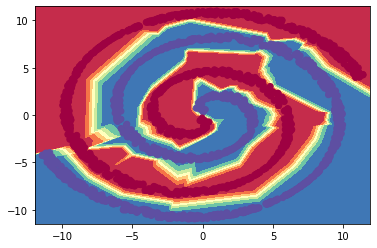

In [7]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], 32)[:, 0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap=plt.cm.Spectral)